### Project 1 - Student Test Performance

#### Outline:
##### 1. Data Importing/Cleaning/Filtering
##### 2. Statistics
##### 3. Visualizations
##### 4. Conclusion

##### 1. Imports

In [336]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

svs = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

#### *1B. Getting to the know the data*

In [337]:
"""
The info() function tells us the number of columns, labels, data types, memory usage, range index
and the number of cells in each column that are non-null values.
"""

svs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  Number Scoring

In [338]:
# The head() function shows us the first five rows of the dataframe.

svs.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [339]:
# Returns the number of missing values in the dataframe.

svs.isnull().sum().sum()

10

In [340]:
# Return the number of missing values in the dataframe by column.

svs.isnull().sum()

School DBN                      0
School Name                     0
School Level                    0
Regents Exam                   10
Year                            0
Total Tested                    0
Mean Score                      0
Number Scoring Below 65         0
Percent Scoring Below 65        0
Number Scoring 65 or Above      0
Percent Scoring 65 or Above     0
Number Scoring 80 or Above      0
Percent Scoring 80 or Above     0
Number Scoring CR               0
Percent Scoring CR              0
dtype: int64

In [341]:
# value_counts() function returns the count of unique entries in the column.

svs['Year'].value_counts()

2016    76123
2015    72768
2017    63440
Name: Year, dtype: int64

In [342]:
svs['Regents Exam'].value_counts()

Common Core Algebra                29254
Living Environment                 25539
U.S. History and Government        20426
Common Core English                19878
Global History and Geography       19192
Physical Settings/Earth Science    15971
Common Core Geometry               15267
Physical Settings/Chemistry        11670
English                            11091
Integrated Algebra                 11022
Algebra2/Trigonometry              10788
Geometry                            8509
Common Core Algebra2                7915
Physical Settings/Physics           5799
Name: Regents Exam, dtype: int64

#### *1C. Data Cleaning*

In [343]:
# Replace all standard missing values (10) in the column "Regents Exam" and labels it as "Data Issue".

svs['Regents Exam'].fillna('Data Issue', inplace=True)

In [371]:
# Check to see if the above piece of code worked.

svs['Regents Exam'].value_counts()

Common Core Algebra                29254
Living Environment                 25539
U.S. History and Government        20426
Common Core English                19878
Global History and Geography       19192
Physical Settings/Earth Science    15971
Common Core Geometry               15267
Physical Settings/Chemistry        11670
English                            11091
Integrated Algebra                 11022
Algebra2/Trigonometry              10788
Geometry                            8509
Common Core Algebra2                7915
Physical Settings/Physics           5799
Data Issue                            10
Name: Regents Exam, dtype: int64

In [345]:
# Datatype for "Mean Score" looks like it should be numeric.

svs['Mean Score']

0            s
1         77.9
2           74
3            s
4            s
          ... 
212326       s
212327       s
212328       s
212329       s
212330       s
Name: Mean Score, Length: 212331, dtype: object

In [346]:
# Convert column "Mean Score" to a float datatype.

svs['Mean Score'] = pd.to_numeric(svs['Mean Score'], errors='coerce')

In [347]:
svs['Mean Score']

0          NaN
1         77.9
2         74.0
3          NaN
4          NaN
          ... 
212326     NaN
212327     NaN
212328     NaN
212329     NaN
212330     NaN
Name: Mean Score, Length: 212331, dtype: float64

In [348]:
# Replace the NaN (Not a Number) cells with 0.0

svs['Mean Score'].fillna(0.0, inplace=True)

In [349]:
svs['Mean Score']

0          0.0
1         77.9
2         74.0
3          0.0
4          0.0
          ... 
212326     0.0
212327     0.0
212328     0.0
212329     0.0
212330     0.0
Name: Mean Score, Length: 212331, dtype: float64

In [350]:
svs.columns

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Percent Scoring Below 65', 'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above', 'Number Scoring CR',
       'Percent Scoring CR'],
      dtype='object')

In [351]:
# Renaming columns and saving it in a new dataframe

svs2 = svs.rename(columns={ 'Year' : 'School Year','Total Tested': '# of Students Tested', 'Mean Score':'Average Score'})

In [352]:
svs2.columns

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam',
       'School Year', '# of Students Tested', 'Average Score',
       'Number Scoring Below 65', 'Percent Scoring Below 65',
       'Number Scoring 65 or Above', 'Percent Scoring 65 or Above',
       'Number Scoring 80 or Above', 'Percent Scoring 80 or Above',
       'Number Scoring CR', 'Percent Scoring CR'],
      dtype='object')

In [353]:
# Drops columns not needed for this analysis 

drop_cols = ['Number Scoring Below 65', 'Percent Scoring Below 65',
            'Number Scoring 65 or Above', 'Percent Scoring 65 or Above',
            'Number Scoring 80 or Above', 'Percent Scoring 80 or Above',
            'Number Scoring CR', 'Percent Scoring CR']
svs2.drop(drop_cols, inplace = True, axis=1)

In [354]:
svs2.columns

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam',
       'School Year', '# of Students Tested', 'Average Score'],
      dtype='object')

#### *1D. Data Filtering*

In [355]:
# fuzzy matching

svs2[svs2['School Name'].str.contains('Cardozo')]

,School DBN,School Name,School Level,Regents Exam,School Year,# of Students Tested,Average Score
14511,26Q415,Benjamin N. Cardozo High School,High school,Algebra2/Trigonometry,2015,644,67.0
14512,26Q415,Benjamin N. Cardozo High School,High school,Algebra2/Trigonometry,2016,628,67.9
14513,26Q415,Benjamin N. Cardozo High School,High school,Algebra2/Trigonometry,2017,49,48.3
14514,26Q415,Benjamin N. Cardozo High School,High school,Common Core Algebra,2015,458,64.3
14515,26Q415,Benjamin N. Cardozo High School,High school,Common Core Algebra,2016,837,71.2
...,...,...,...,...,...,...,...
194043,26Q415,Benjamin N. Cardozo High School,High school,U.S. History and Government,2017,379,85.7
194044,26Q415,Benjamin N. Cardozo High School,High school,U.S. History and Government,2017,165,79.4
194045,26Q415,Benjamin N. Cardozo High School,High school,U.S. History and Government,2017,164,79.0
194046,26Q415,Benjamin N. Cardozo High School,High school,U.S. History and Government,2017,8,85.8


In [356]:
svs2[svs2['School Name'].str.contains('Francis Lewis High School')]

,School DBN,School Name,School Level,Regents Exam,School Year,# of Students Tested,Average Score
14549,26Q430,Francis Lewis High School,High school,Algebra2/Trigonometry,2015,845,77.8
14550,26Q430,Francis Lewis High School,High school,Algebra2/Trigonometry,2016,889,76.7
14551,26Q430,Francis Lewis High School,High school,Algebra2/Trigonometry,2017,19,59.8
14552,26Q430,Francis Lewis High School,High school,Common Core Algebra,2015,541,67.1
14553,26Q430,Francis Lewis High School,High school,Common Core Algebra,2016,900,77.8
...,...,...,...,...,...,...,...
194228,26Q430,Francis Lewis High School,High school,U.S. History and Government,2017,670,85.7
194229,26Q430,Francis Lewis High School,High school,U.S. History and Government,2017,64,78.7
194230,26Q430,Francis Lewis High School,High school,U.S. History and Government,2017,225,77.4
194231,26Q430,Francis Lewis High School,High school,U.S. History and Government,2017,9,92.3


In [357]:
# Make a list of the schools wanted in the filter results
schools = ['Benjamin N. Cardozo High School','Francis Lewis High School']

# Assign the return series to a variable named 'filt' (short for filter)
# .isin() allows to plug in the above list 
filt = svs2['School Name'].isin(schools) & (svs2['Regents Exam'] == 'U.S. History and Government')

In [358]:
# Create a new dataframe after applying the filter to the dataframe

svs3 = svs2.loc[filt]

In [359]:
# Create a new dataframe that consists of a subset of only the columns needed for the analysis

svs4 = svs3[['School Name','Regents Exam','School Year','# of Students Tested','Average Score']]

In [360]:
# This is dataset that will be used for the statistics and visualizations portions

svs4

,School Name,Regents Exam,School Year,# of Students Tested,Average Score
14546,Benjamin N. Cardozo High School,U.S. History and Government,2015,880,83.5
14547,Benjamin N. Cardozo High School,U.S. History and Government,2016,904,82.5
14548,Benjamin N. Cardozo High School,U.S. History and Government,2017,833,82.9
14584,Francis Lewis High School,U.S. History and Government,2015,1122,82.7
14585,Francis Lewis High School,U.S. History and Government,2016,1036,83.4
...,...,...,...,...,...
194228,Francis Lewis High School,U.S. History and Government,2017,670,85.7
194229,Francis Lewis High School,U.S. History and Government,2017,64,78.7
194230,Francis Lewis High School,U.S. History and Government,2017,225,77.4
194231,Francis Lewis High School,U.S. History and Government,2017,9,92.3


#### *2. Statistics*

In [361]:
# Summary statistics

svs4.describe()

,School Year,# of Students Tested,Average Score
count,78.000000,78.000000,78.000000
mean,2016.000000,379.743590,81.130769
std,0.821781,310.353022,5.875490
min,2015.000000,8.000000,64.500000
25%,2015.000000,129.000000,79.100000
50%,2016.000000,299.000000,83.200000
75%,2017.000000,599.250000,84.775000
max,2017.000000,1149.000000,92.300000


In [362]:
# Comparing the number of students tested each school year

Yp

Regents Exam                 School Year  School Name                    
U.S. History and Government  2015         Benjamin N. Cardozo High School    4400
                                          Francis Lewis High School          5610
                             2016         Benjamin N. Cardozo High School    4520
                                          Francis Lewis High School          5180
                             2017         Benjamin N. Cardozo High School    4165
                                          Francis Lewis High School          5745
Name: # of Students Tested, dtype: int64

In [363]:
# Median average score each school year

svs4.groupby(['Regents Exam','School Year','School Name'])['Average Score'].median()

Regents Exam                 School Year  School Name                    
U.S. History and Government  2015         Benjamin N. Cardozo High School    83.5
                                          Francis Lewis High School          83.3
                             2016         Benjamin N. Cardozo High School    82.5
                                          Francis Lewis High School          83.4
                             2017         Benjamin N. Cardozo High School    83.1
                                          Francis Lewis High School          84.6
Name: Average Score, dtype: float64

In [364]:
# Average score each school year

svs4.groupby(['Regents Exam','School Year','School Name'])['Average Score'].mean()

Regents Exam                 School Year  School Name                    
U.S. History and Government  2015         Benjamin N. Cardozo High School    81.700000
                                          Francis Lewis High School          80.907692
                             2016         Benjamin N. Cardozo High School    80.184615
                                          Francis Lewis High School          81.423077
                             2017         Benjamin N. Cardozo High School    80.807692
                                          Francis Lewis High School          81.761538
Name: Average Score, dtype: float64

In [365]:
# Minimum average score by school year

svs4.groupby(['Regents Exam','School Year','School Name'])['Average Score'].min()

Regents Exam                 School Year  School Name                    
U.S. History and Government  2015         Benjamin N. Cardozo High School    67.9
                                          Francis Lewis High School          66.0
                             2016         Benjamin N. Cardozo High School    64.5
                                          Francis Lewis High School          68.2
                             2017         Benjamin N. Cardozo High School    65.8
                                          Francis Lewis High School          65.4
Name: Average Score, dtype: float64

In [366]:
# Maximum average score by school year

svs4.groupby(['Regents Exam','School Year','School Name'])['Average Score'].max()

Regents Exam                 School Year  School Name                    
U.S. History and Government  2015         Benjamin N. Cardozo High School    87.2
                                          Francis Lewis High School          85.0
                             2016         Benjamin N. Cardozo High School    85.4
                                          Francis Lewis High School          85.8
                             2017         Benjamin N. Cardozo High School    85.8
                                          Francis Lewis High School          92.3
Name: Average Score, dtype: float64

#### *3. Visualizations*

In [367]:
sns.set()                             # (Re)set the seaborn default
sns.set_style("whitegrid")
sns.axes_style("whitegrid") 
sns.set(rc={'figure.figsize':(11.7,8.27)}) # Set size of charts

Text(0, 0.5, '')

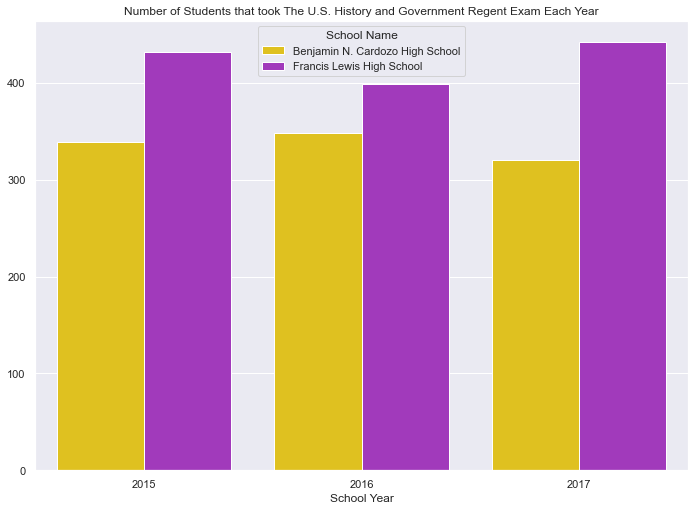

In [368]:
bp = sns.barplot(x="School Year",
           y="# of Students Tested",
           hue="School Name",
           palette=['#FFD700', '#ae24d1'],
           data=svs4,
           ci=None)

bp.set_title('Number of Students that took The U.S. History and Government Regent Exam Each Year')
bp.set_ylabel(None)

Text(0, 0.5, '')

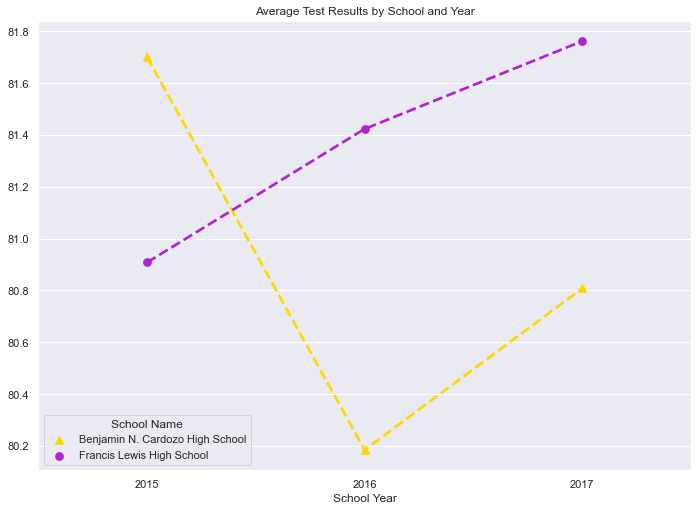

In [369]:
pp = sns.pointplot(x="School Year",
             y='Average Score',
             hue="School Name",
             palette=['#FFD700', '#ae24d1'],
             data=svs4,
             markers=["^","o"],
             linestyles=["--","--"],
             ci=None)

pp.set_title('Average Test Results by School and Year')
pp.set_ylabel(None)

Text(0.5, 1.0, 'Identifying Outliers of Average Test Scores')

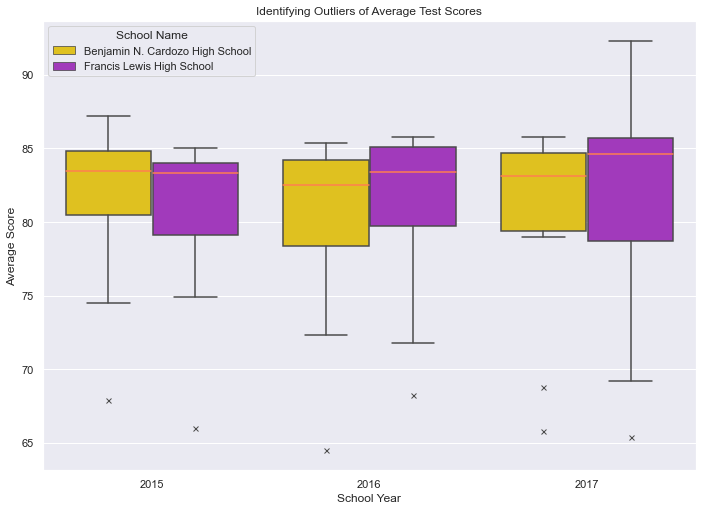

In [370]:
bp=sns.boxplot(x="School Year",
           y="Average Score",
           hue="School Name",
           palette=['#FFD700', '#ae24d1'],
           data=svs4,
           medianprops={"color": "coral"},
           flierprops={"marker": "x"})

bp.set_title('Identifying Outliers of Average Test Scores')

#### *4. Conclusion*

<img src="FL_Mascot.jpg" width = "300" height = "100">

#### Looking at the average test scores for the U.S. History and Government Regent Exams from 2015 through 2017. Francis Lewis High School average test score improved, while the test score average for Benjamin N. Cardozo dropped when compared to 2015. Francis Lewis High School also had more students take the exam each year.